In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)

In [2]:
train_df = pd.read_csv("Resources/sales_train_evaluation.csv")
calendar_df = pd.read_csv("Resources/calendar.csv")
sell_prices_df = pd.read_csv("Resources/sell_prices.csv")

# Separating States In Train Data Set

In [3]:
ca_sales_df = train_df[train_df['state_id']=='CA'].copy()
print(f'Data frame for California has {ca_sales_df.isna().sum().sum()} NA values')
tx_sales_df = train_df[train_df['state_id']=='TX'].copy()
print(f'Data frame for Texas has {tx_sales_df.isna().sum().sum()} NA values')
wi_sales_df = train_df[train_df['state_id']=='WI'].copy()
print(f'Data frame for Wisconsin has {wi_sales_df.isna().sum().sum()} NA values')

Data frame for California has 0 NA values
Data frame for Texas has 0 NA values
Data frame for Wisconsin has 0 NA values


In [4]:
display(ca_sales_df.head())
display(tx_sales_df.head())
display(wi_sales_df.head())

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

id        item_id    dept_id   cat_id  \
12196  HOBBIES_1_001_TX_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
12197  HOBBIES_1_002_TX_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
12198  HOBBIES_1_003_TX_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
12199  HOBBIES_1_004_TX_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
12200  HOBBIES_1_005_TX_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
12196     TX_1       TX    0    0    0    0  ...       0       0       0   
12197     TX_1       TX    0    0    0    0  ...       0       0       0   
12198     TX_1       TX    0    0    0    0  ...       0       0       0   
12199     TX_1       TX    1    2    1    0  ...       0       0       0   
12200     TX_1       TX    0    0    0    0  ...       0       0       1   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
12196       2       1       0       2       1       0       1  
12197       0       0       0       1       0       0       0  
12198       0       0       0       0       0       0       0  
12199       0       4       0       0       2       4       2  
12200       0       3       1       1       0       0       1  

[5 rows x 1947 columns]

id        item_id    dept_id   cat_id  \
21343  HOBBIES_1_001_WI_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
21344  HOBBIES_1_002_WI_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
21345  HOBBIES_1_003_WI_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
21346  HOBBIES_1_004_WI_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
21347  HOBBIES_1_005_WI_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  \
21343     WI_1       WI    0    0    0    0  ...       0       1       0   
21344     WI_1       WI    0    0    0    0  ...       0       1       0   
21345     WI_1       WI    0    0    0    0  ...       0       0       0   
21346     WI_1       WI    2    1    0    0  ...       0       0       0   
21347     WI_1       WI    0    0    0    0  ...       3       1       0   

       d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
21343       2       0       0       0       0       1       2  
21344       1       0       0       0       1       1       1  
21345       0       0       0       0       0       1       0  
21346       0       0       1       0       0       0       1  
21347       0       0       1       0       0       0       3  

[5 rows x 1947 columns]

# Separating States in Sell Prices Data Set

In [5]:
ca_sell_prices = sell_prices_df[sell_prices_df["store_id"].isin(["CA_1","CA_2","CA_3","CA_4"])]
print(f'Sell Pricess for California has shape {ca_sell_prices.shape} and {ca_sell_prices.isna().sum().sum()} NA values')
tx_sell_prices = sell_prices_df[sell_prices_df['store_id'].isin(['TX_1', 'TX_2', 'TX_3'])]
print(f'Sell Pricess for Texas has has shape {tx_sell_prices.shape} and {tx_sell_prices.isna().sum().sum()} NA values')
wi_sell_prices = sell_prices_df[sell_prices_df['store_id'].isin(['WI_1','WI_2', 'WI_3'])]
print(f'Sell Pricess for Wisconsin has has shape {wi_sell_prices.shape} and {wi_sell_prices.isna().sum().sum()} NA values')

Sell Pricess for California has shape (2708822, 4) and 0 NA values
Sell Pricess for Texas has has shape (2092122, 4) and 0 NA values
Sell Pricess for Wisconsin has has shape (2040177, 4) and 0 NA values


In [6]:
display(ca_sell_prices.head())
display(tx_sell_prices.head())
display(wi_sell_prices.head())

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

store_id        item_id  wm_yr_wk  sell_price
2708822     TX_1  HOBBIES_1_001     11325        9.58
2708823     TX_1  HOBBIES_1_001     11326        8.26
2708824     TX_1  HOBBIES_1_001     11327        8.26
2708825     TX_1  HOBBIES_1_001     11328        8.26
2708826     TX_1  HOBBIES_1_001     11329        8.26

store_id        item_id  wm_yr_wk  sell_price
4800944     WI_1  HOBBIES_1_001     11325        9.58
4800945     WI_1  HOBBIES_1_001     11326        9.58
4800946     WI_1  HOBBIES_1_001     11327        9.58
4800947     WI_1  HOBBIES_1_001     11328        9.58
4800948     WI_1  HOBBIES_1_001     11329        9.58

# Melting Sales Data Frame to join with other Data Frames

In [7]:
# Melting California DataFrame
ca_sales_df_melted = ca_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
ca_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

# Melting Texas DataFrame
tx_sales_df_melted = tx_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
tx_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

# Melting Wisconsin DataFrame
wi_sales_df_melted = wi_sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])
wi_sales_df_melted.rename({"variable":"Day","value":"Quantity"},axis=1,inplace=True)

In [8]:
display(ca_sales_df_melted.head())
display(tx_sales_df_melted.head())
display(wi_sales_df_melted.head())

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  Day  Quantity  
0       CA  d_1         0  
1       CA  d_1         0  
2       CA  d_1         0  
3       CA  d_1         0  
4       CA  d_1         0

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_TX_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     TX_1   
1  HOBBIES_1_002_TX_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     TX_1   
2  HOBBIES_1_003_TX_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     TX_1   
3  HOBBIES_1_004_TX_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     TX_1   
4  HOBBIES_1_005_TX_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     TX_1   

  state_id  Day  Quantity  
0       TX  d_1         0  
1       TX  d_1         0  
2       TX  d_1         0  
3       TX  d_1         1  
4       TX  d_1         0

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_WI_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     WI_1   
1  HOBBIES_1_002_WI_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     WI_1   
2  HOBBIES_1_003_WI_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     WI_1   
3  HOBBIES_1_004_WI_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     WI_1   
4  HOBBIES_1_005_WI_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     WI_1   

  state_id  Day  Quantity  
0       WI  d_1         0  
1       WI  d_1         0  
2       WI  d_1         0  
3       WI  d_1         2  
4       WI  d_1         0

# Joining All Three Data Frames

In [9]:
calendar_df.head(10)

date  wm_yr_wk    weekday  wday  month  year     d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011   d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011   d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011   d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011   d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011   d_5          NaN   
5  2011-02-03     11101   Thursday     6      2  2011   d_6          NaN   
6  2011-02-04     11101     Friday     7      2  2011   d_7          NaN   
7  2011-02-05     11102   Saturday     1      2  2011   d_8          NaN   
8  2011-02-06     11102     Sunday     2      2  2011   d_9    SuperBowl   
9  2011-02-07     11102     Monday     3      2  2011  d_10          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1  
5          NaN          NaN          NaN        1        1        1  
6          NaN          NaN          NaN        1        0        0  
7          NaN          NaN          NaN        1        1        1  
8     Sporting          NaN          NaN        1        1        1  
9          NaN          NaN          NaN        1        1        0

In [10]:
# Join for Clalifornia
ca_joined_df = pd.merge(left=ca_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
ca_joined_df = pd.merge(left=ca_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
ca_joined_df.drop(["snap_TX","snap_WI"],axis=1,inplace=True)
ca_joined_df['total_sales'] = ca_joined_df['Quantity'] * ca_joined_df['sell_price']

# Join for Texas
tx_joined_df = pd.merge(left=tx_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
tx_joined_df = pd.merge(left=tx_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
tx_joined_df.drop(["snap_CA","snap_WI"],axis=1,inplace=True)
tx_joined_df['total_sales'] = tx_joined_df['Quantity'] * tx_joined_df['sell_price']

# Join for Wisconsin
wi_joined_df = pd.merge(left=wi_sales_df_melted, right=calendar_df, how='left', left_on='Day', right_on='d')
wi_joined_df = pd.merge(left=wi_joined_df, right=sell_prices_df, how='left', on=["store_id","item_id","wm_yr_wk"])
wi_joined_df.drop(["snap_CA","snap_TX"],axis=1,inplace=True)
wi_joined_df['total_sales'] = wi_joined_df['Quantity'] * wi_joined_df['sell_price']

In [11]:
display(ca_joined_df.head())
display(tx_joined_df.head())
display(wi_joined_df.head())

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  Day  Quantity        date  wm_yr_wk  ... month  year    d  \
0       CA  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
1       CA  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
2       CA  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
3       CA  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
4       CA  d_1         0  2011-01-29     11101  ...     1  2011  d_1   

   event_name_1 event_type_1 event_name_2 event_type_2 snap_CA sell_price  \
0           NaN          NaN          NaN          NaN       0        NaN   
1           NaN          NaN          NaN          NaN       0        NaN   
2           NaN          NaN          NaN          NaN       0        NaN   
3           NaN          NaN          NaN          NaN       0        NaN   
4           NaN          NaN          NaN          NaN       0        NaN   

   total_sales  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 22 columns]

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_TX_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     TX_1   
1  HOBBIES_1_002_TX_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     TX_1   
2  HOBBIES_1_003_TX_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     TX_1   
3  HOBBIES_1_004_TX_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     TX_1   
4  HOBBIES_1_005_TX_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     TX_1   

  state_id  Day  Quantity        date  wm_yr_wk  ... month  year    d  \
0       TX  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
1       TX  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
2       TX  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
3       TX  d_1         1  2011-01-29     11101  ...     1  2011  d_1   
4       TX  d_1         0  2011-01-29     11101  ...     1  2011  d_1   

   event_name_1 event_type_1 event_name_2 event_type_2 snap_TX sell_price  \
0           NaN          NaN          NaN          NaN       0        NaN   
1           NaN          NaN          NaN          NaN       0        NaN   
2           NaN          NaN          NaN          NaN       0        NaN   
3           NaN          NaN          NaN          NaN       0       4.34   
4           NaN          NaN          NaN          NaN       0        NaN   

   total_sales  
0          NaN  
1          NaN  
2          NaN  
3         4.34  
4          NaN  

[5 rows x 22 columns]

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_WI_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     WI_1   
1  HOBBIES_1_002_WI_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     WI_1   
2  HOBBIES_1_003_WI_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     WI_1   
3  HOBBIES_1_004_WI_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     WI_1   
4  HOBBIES_1_005_WI_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     WI_1   

  state_id  Day  Quantity        date  wm_yr_wk  ... month  year    d  \
0       WI  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
1       WI  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
2       WI  d_1         0  2011-01-29     11101  ...     1  2011  d_1   
3       WI  d_1         2  2011-01-29     11101  ...     1  2011  d_1   
4       WI  d_1         0  2011-01-29     11101  ...     1  2011  d_1   

   event_name_1 event_type_1 event_name_2 event_type_2 snap_WI sell_price  \
0           NaN          NaN          NaN          NaN       0        NaN   
1           NaN          NaN          NaN          NaN       0        NaN   
2           NaN          NaN          NaN          NaN       0        NaN   
3           NaN          NaN          NaN          NaN       0       4.34   
4           NaN          NaN          NaN          NaN       0        NaN   

   total_sales  
0          NaN  
1          NaN  
2          NaN  
3         8.68  
4          NaN  

[5 rows x 22 columns]

# Daily Total (Daily SUM) Sales Aggregation

In [12]:
# Groupby and picot for California
ca_store_sales_sum = ca_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
ca_store_sales_sum['date'] = pd.to_datetime(ca_store_sales_sum['date'])
ca_store_sales_sum = ca_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

# Groupby and picot for Texas
tx_store_sales_sum = tx_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
tx_store_sales_sum['date'] = pd.to_datetime(tx_store_sales_sum['date'])
tx_store_sales_sum = tx_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

# Groupby and picot for Wisconsin
wi_store_sales_sum = wi_joined_df.groupby(['store_id', 'date'], as_index=False).agg(Total_Sales=('total_sales', 'sum'))
wi_store_sales_sum['date'] = pd.to_datetime(wi_store_sales_sum['date'])
wi_store_sales_sum = wi_store_sales_sum.pivot(index="date",columns="store_id",values="Total_Sales")

In [13]:
display(ca_store_sales_sum.head())
display(tx_store_sales_sum.head())
display(wi_store_sales_sum.head())

store_id        CA_1     CA_2      CA_3     CA_4
date                                            
2011-01-29  10933.16  9101.52  11679.83  4561.59
2011-01-30   9787.06  8417.53  12161.46  4681.41
2011-01-31   7201.38  5320.51   9123.86  3637.98
2011-02-01   7407.74  5550.56  10249.78  3708.92
2011-02-02   6566.12  5229.72   9538.65  3841.14

store_id       TX_1     TX_2     TX_3
date                                 
2011-01-29  6586.68  9915.78  7597.99
2011-01-30  6610.60  9804.54  7356.54
2011-01-31  4551.97  6651.16  5406.70
2011-02-01  5374.39  6985.60  5597.97
2011-02-02  4347.07  6039.05  4069.74

store_id       WI_1     WI_2     WI_3
date                                 
2011-01-29  6454.72  5451.46  9367.88
2011-01-30  5645.77  4636.86  9868.80
2011-01-31  3640.12  4621.58  7551.65
2011-02-01  2949.96  5754.75  7181.53
2011-02-02     2.96  2679.19  4646.31

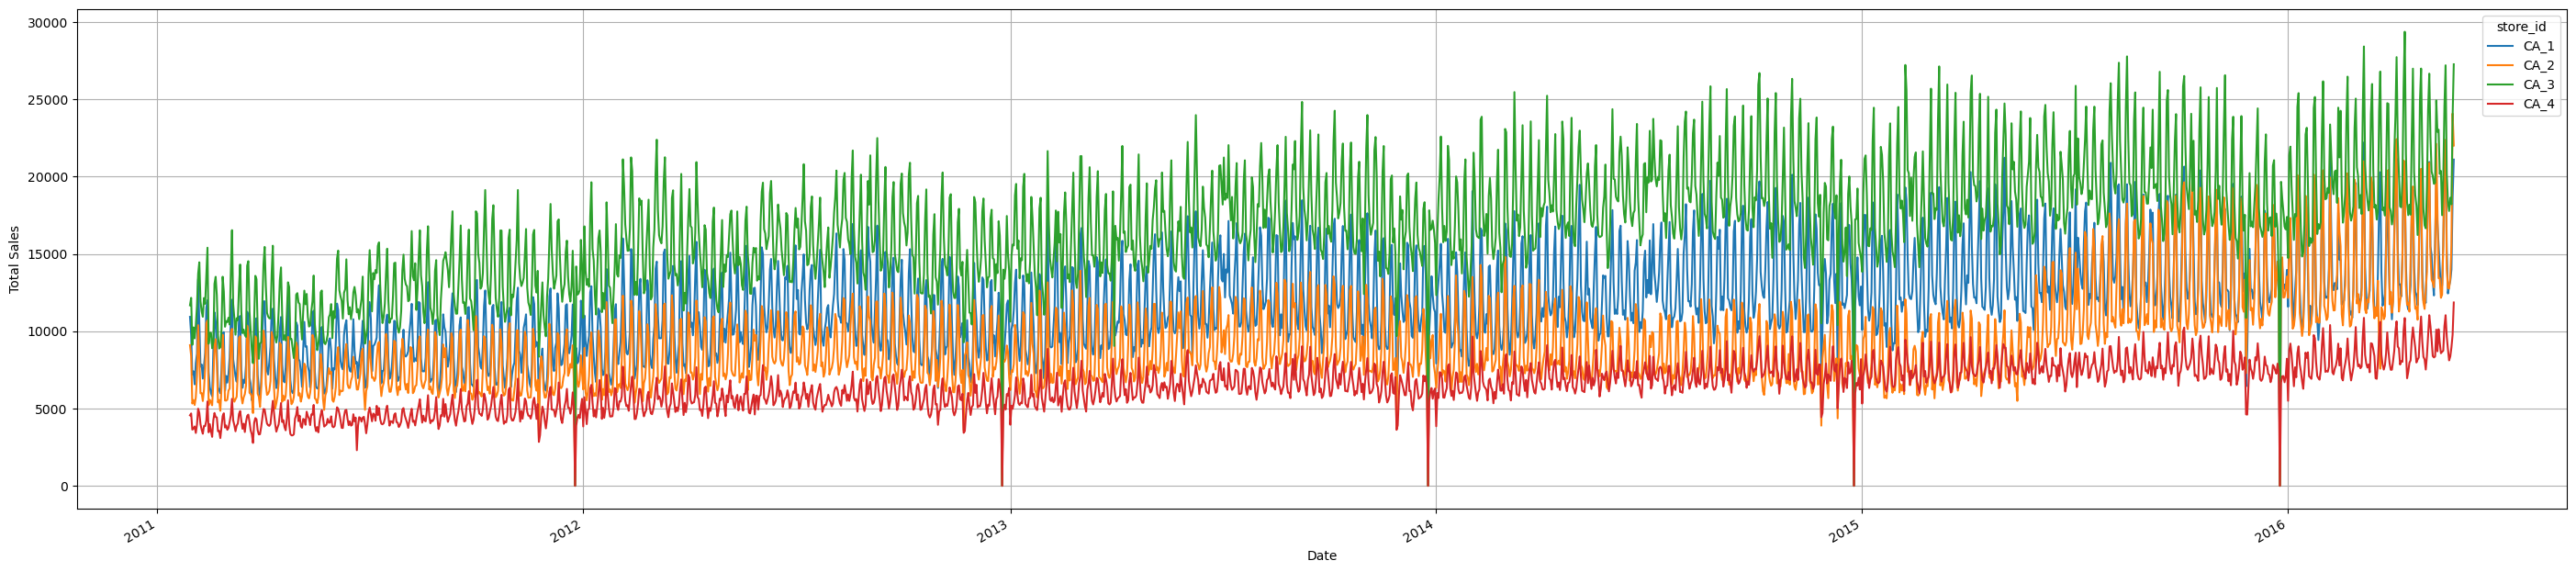

In [14]:
ca_store_sales_sum.plot(legend=True,
                        figsize=(35,8),
                        grid=True,
                        ylabel="Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

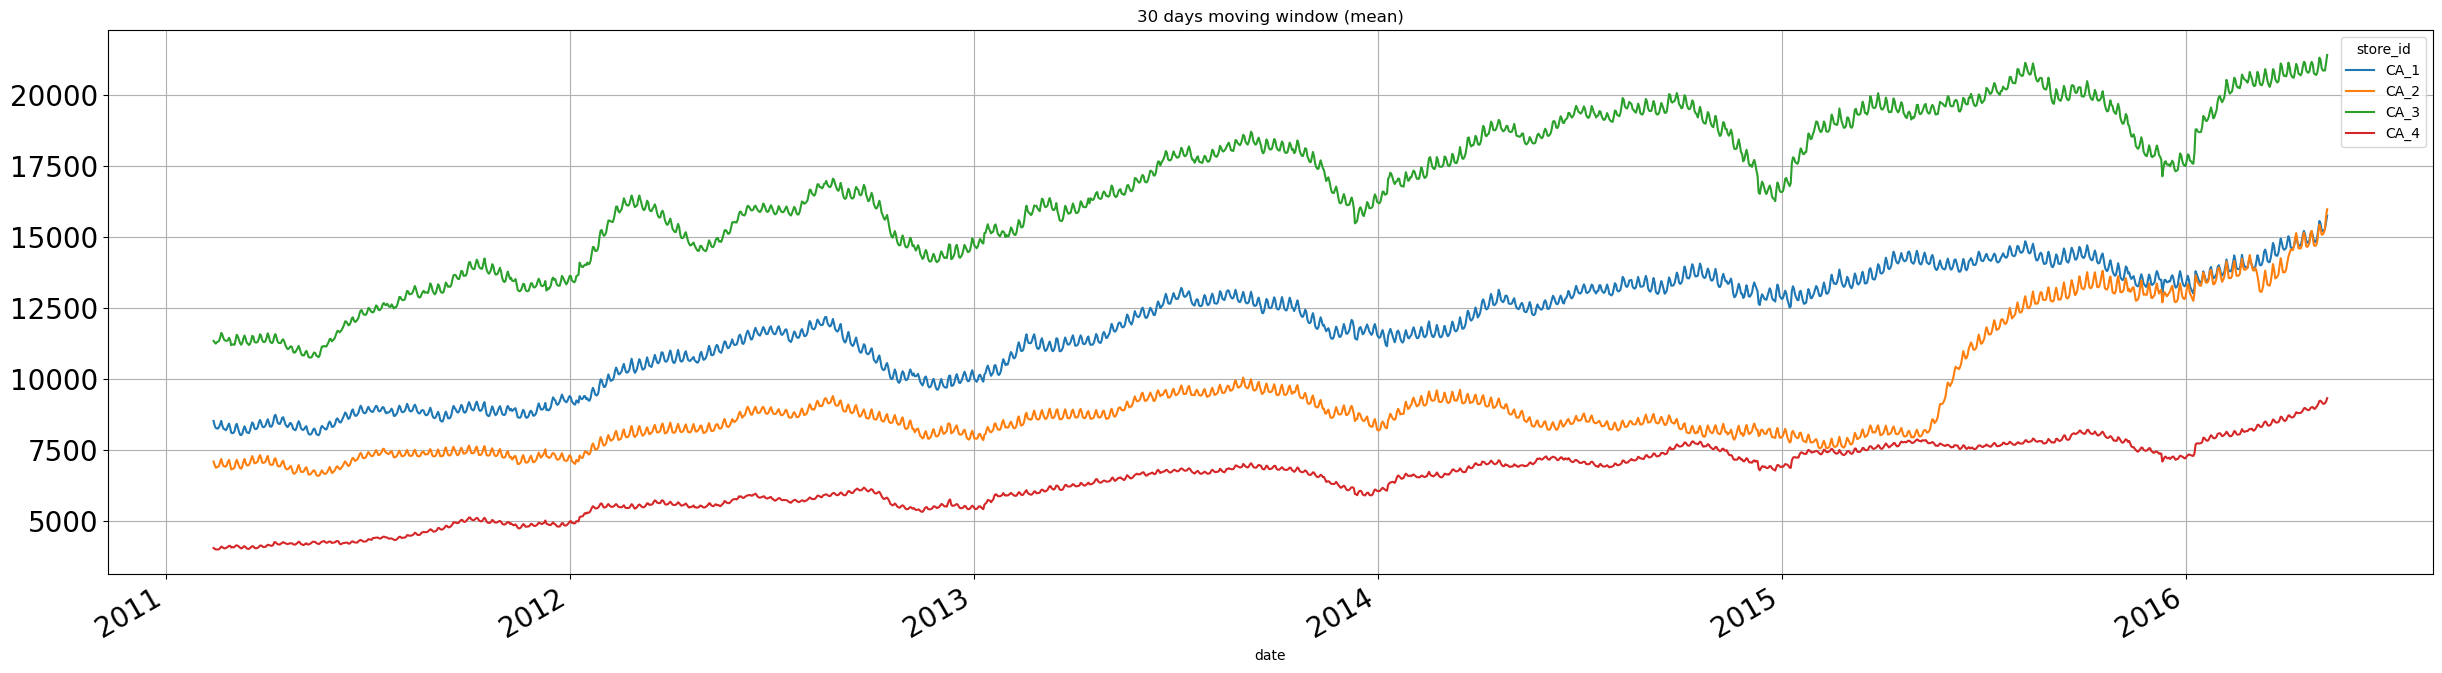

In [15]:
ca_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(30,8), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

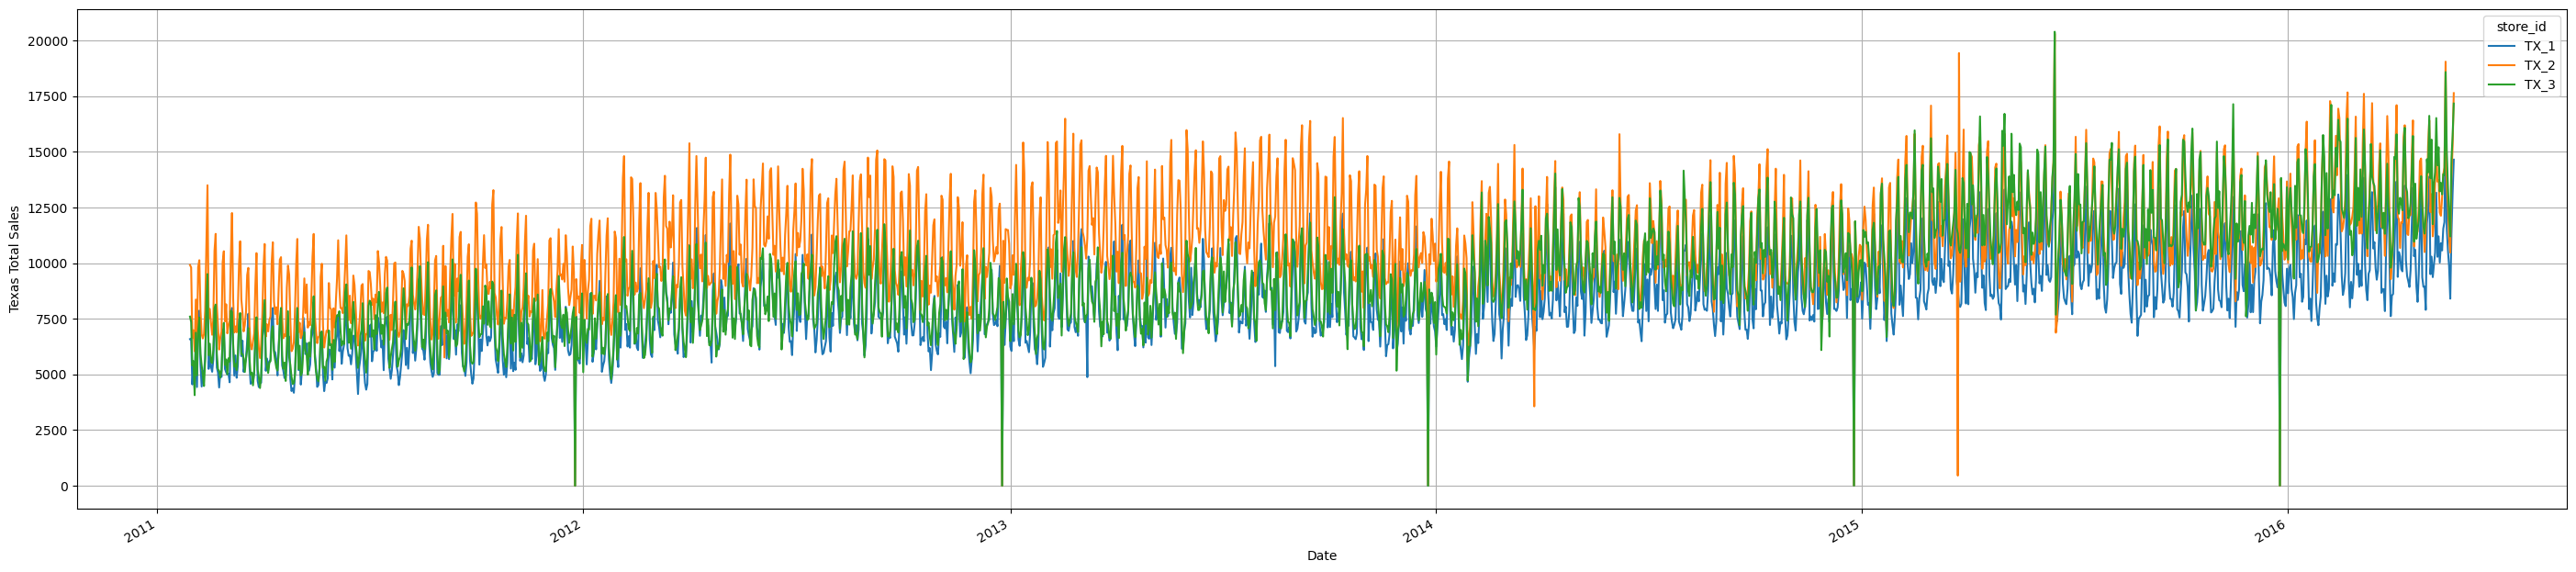

In [16]:
tx_store_sales_sum.plot(legend=True,
                        figsize=(35,8),
                        grid=True,
                        ylabel="Texas Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

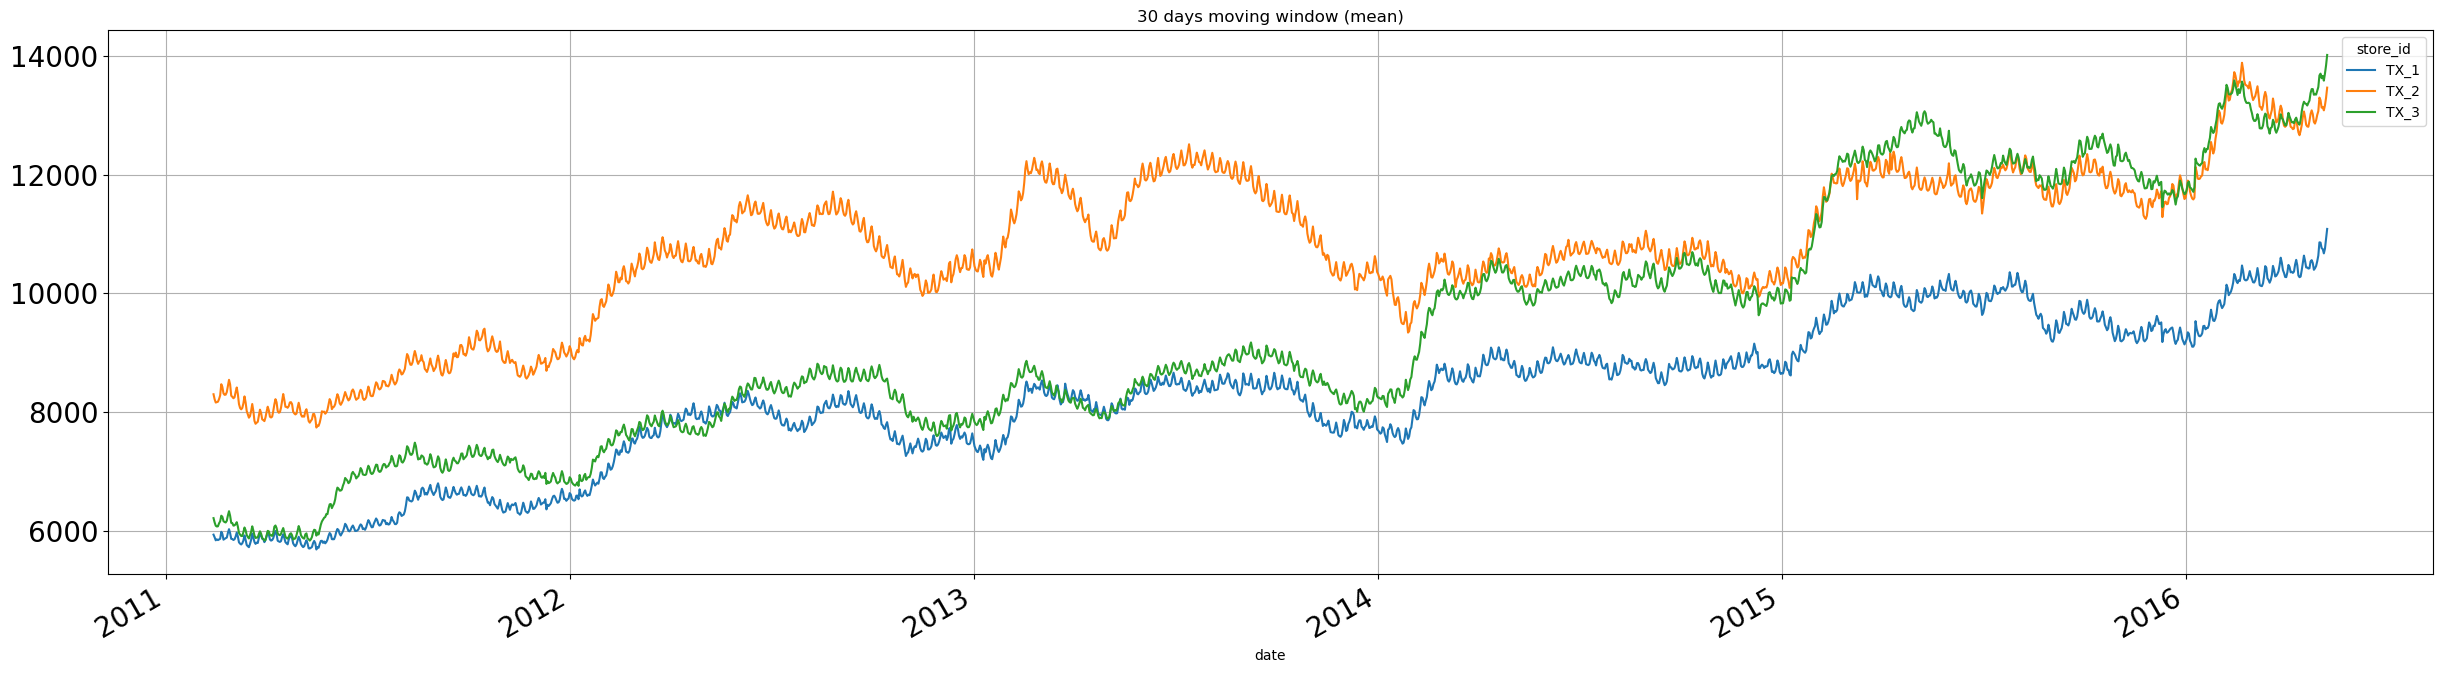

In [17]:
tx_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(30,8), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

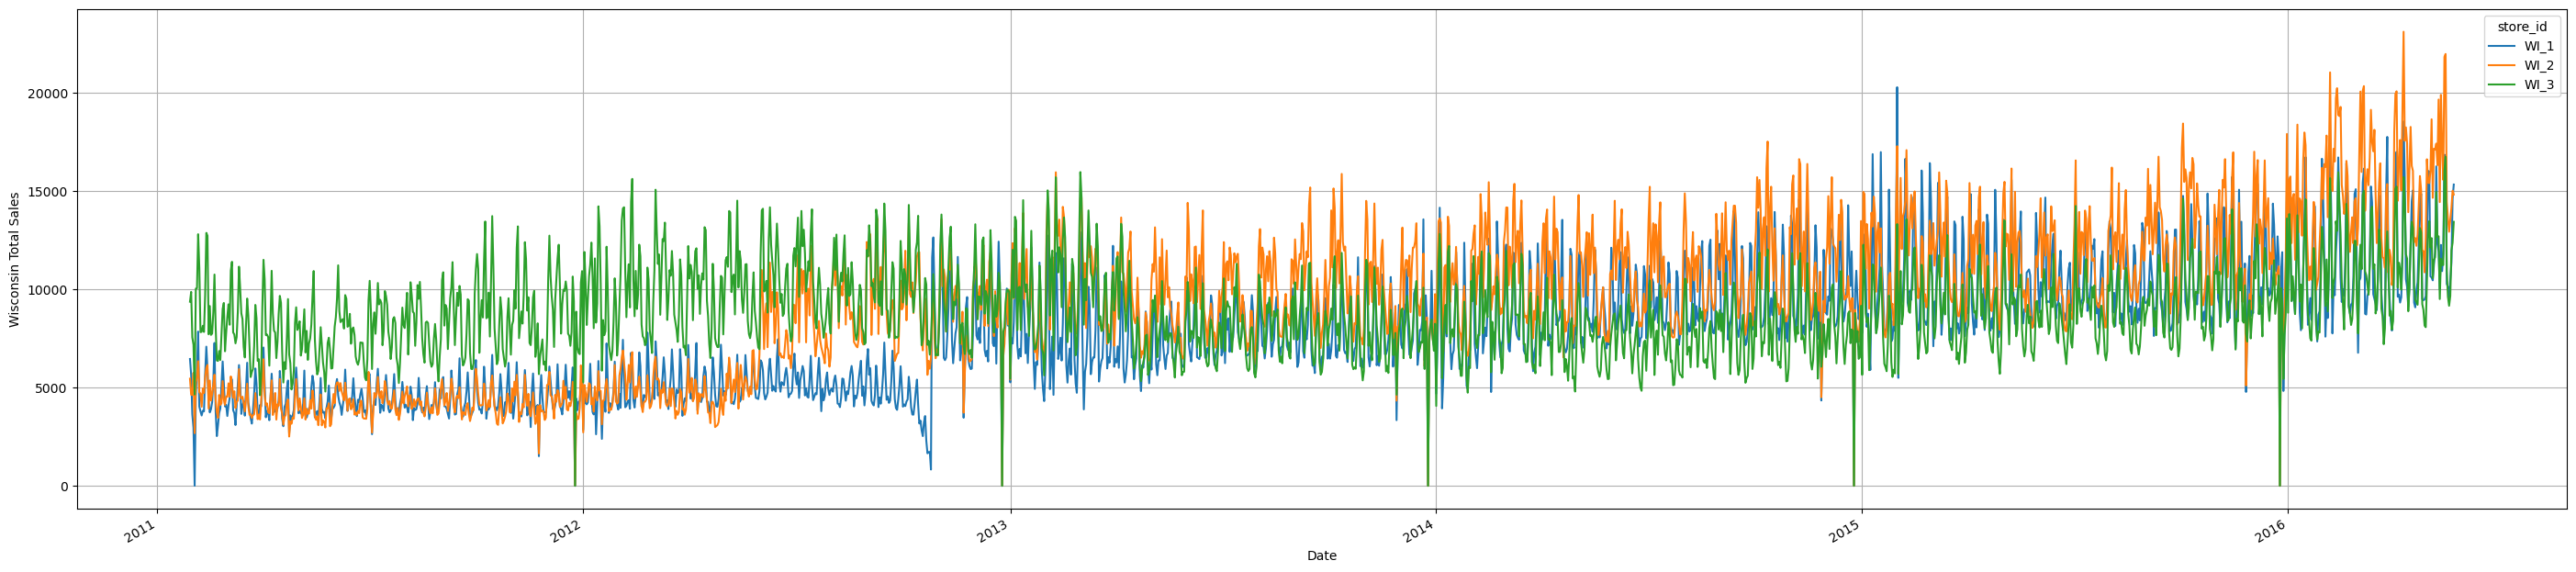

In [18]:
wi_store_sales_sum.plot(legend=True,
                        figsize=(35,8),
                        grid=True,
                        ylabel="Wisconsin Total Sales",
                        xlabel="Date",
                        x_compat=True)
ax = plt.gca()

<Axes: title={'center': '30 days moving window (mean)'}, xlabel='date'>

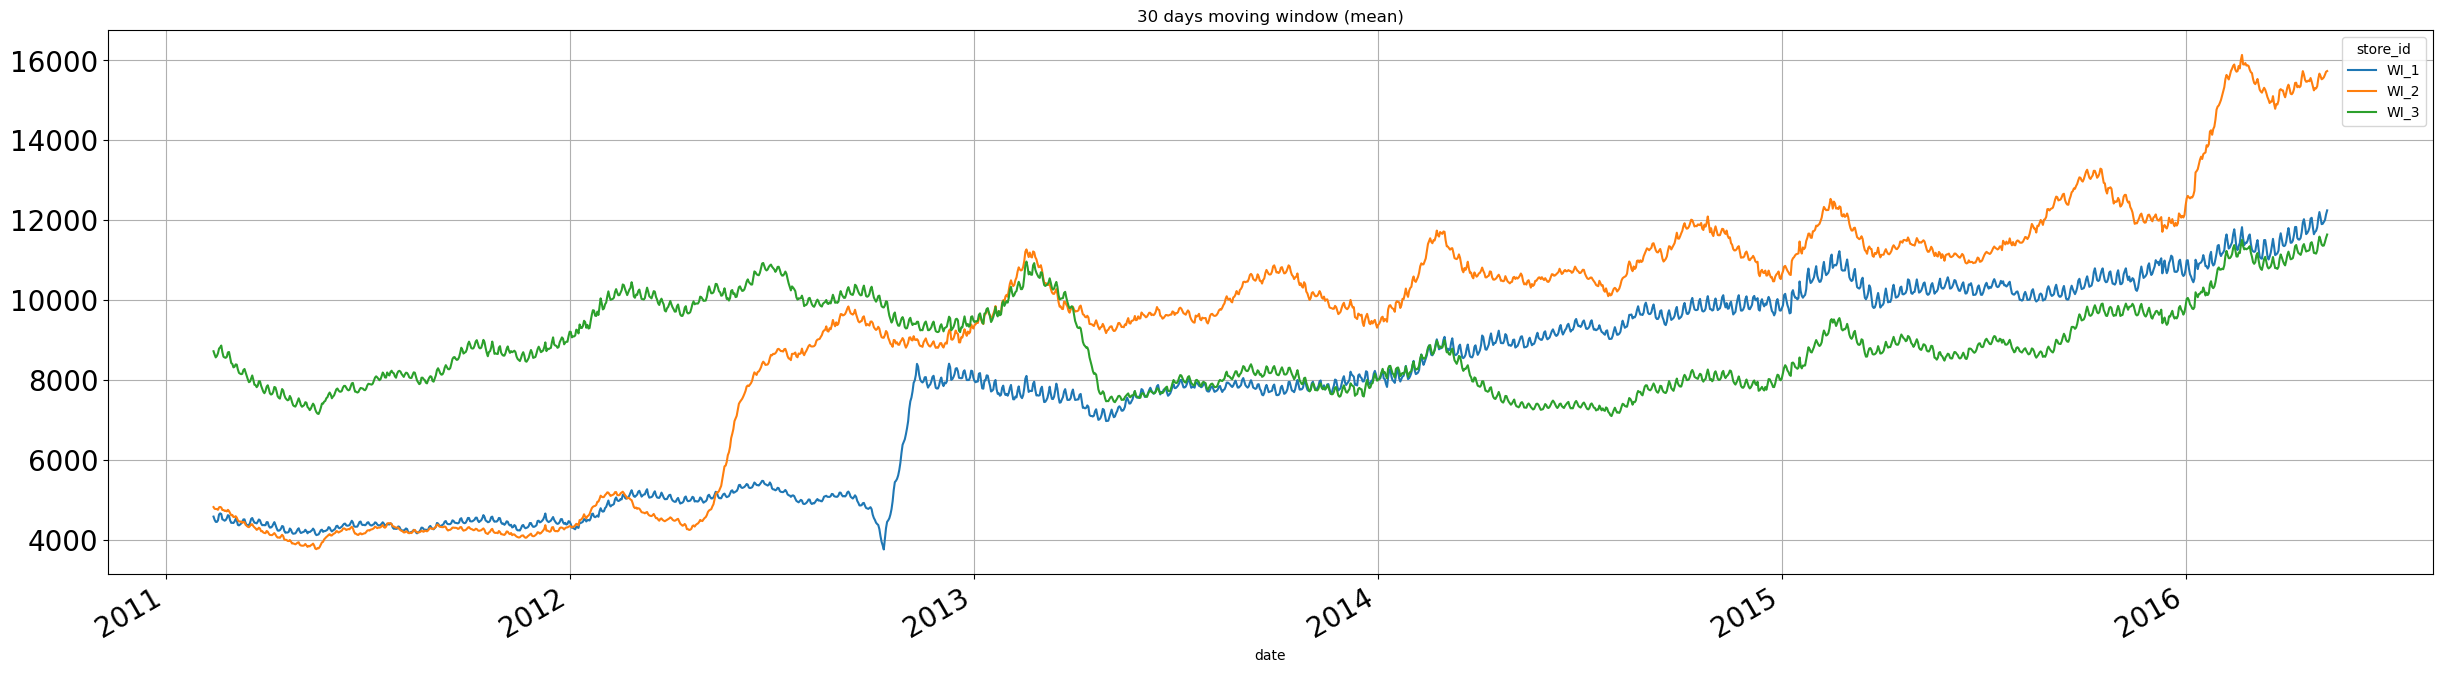

In [19]:
wi_store_sales_sum.rolling(30, center=True).mean().plot(figsize=(30,8), title='30 days moving window (mean)', 
                                                        fontsize=20, grid=True, x_compat=True)

Text(0.5, 0.98, 'California')

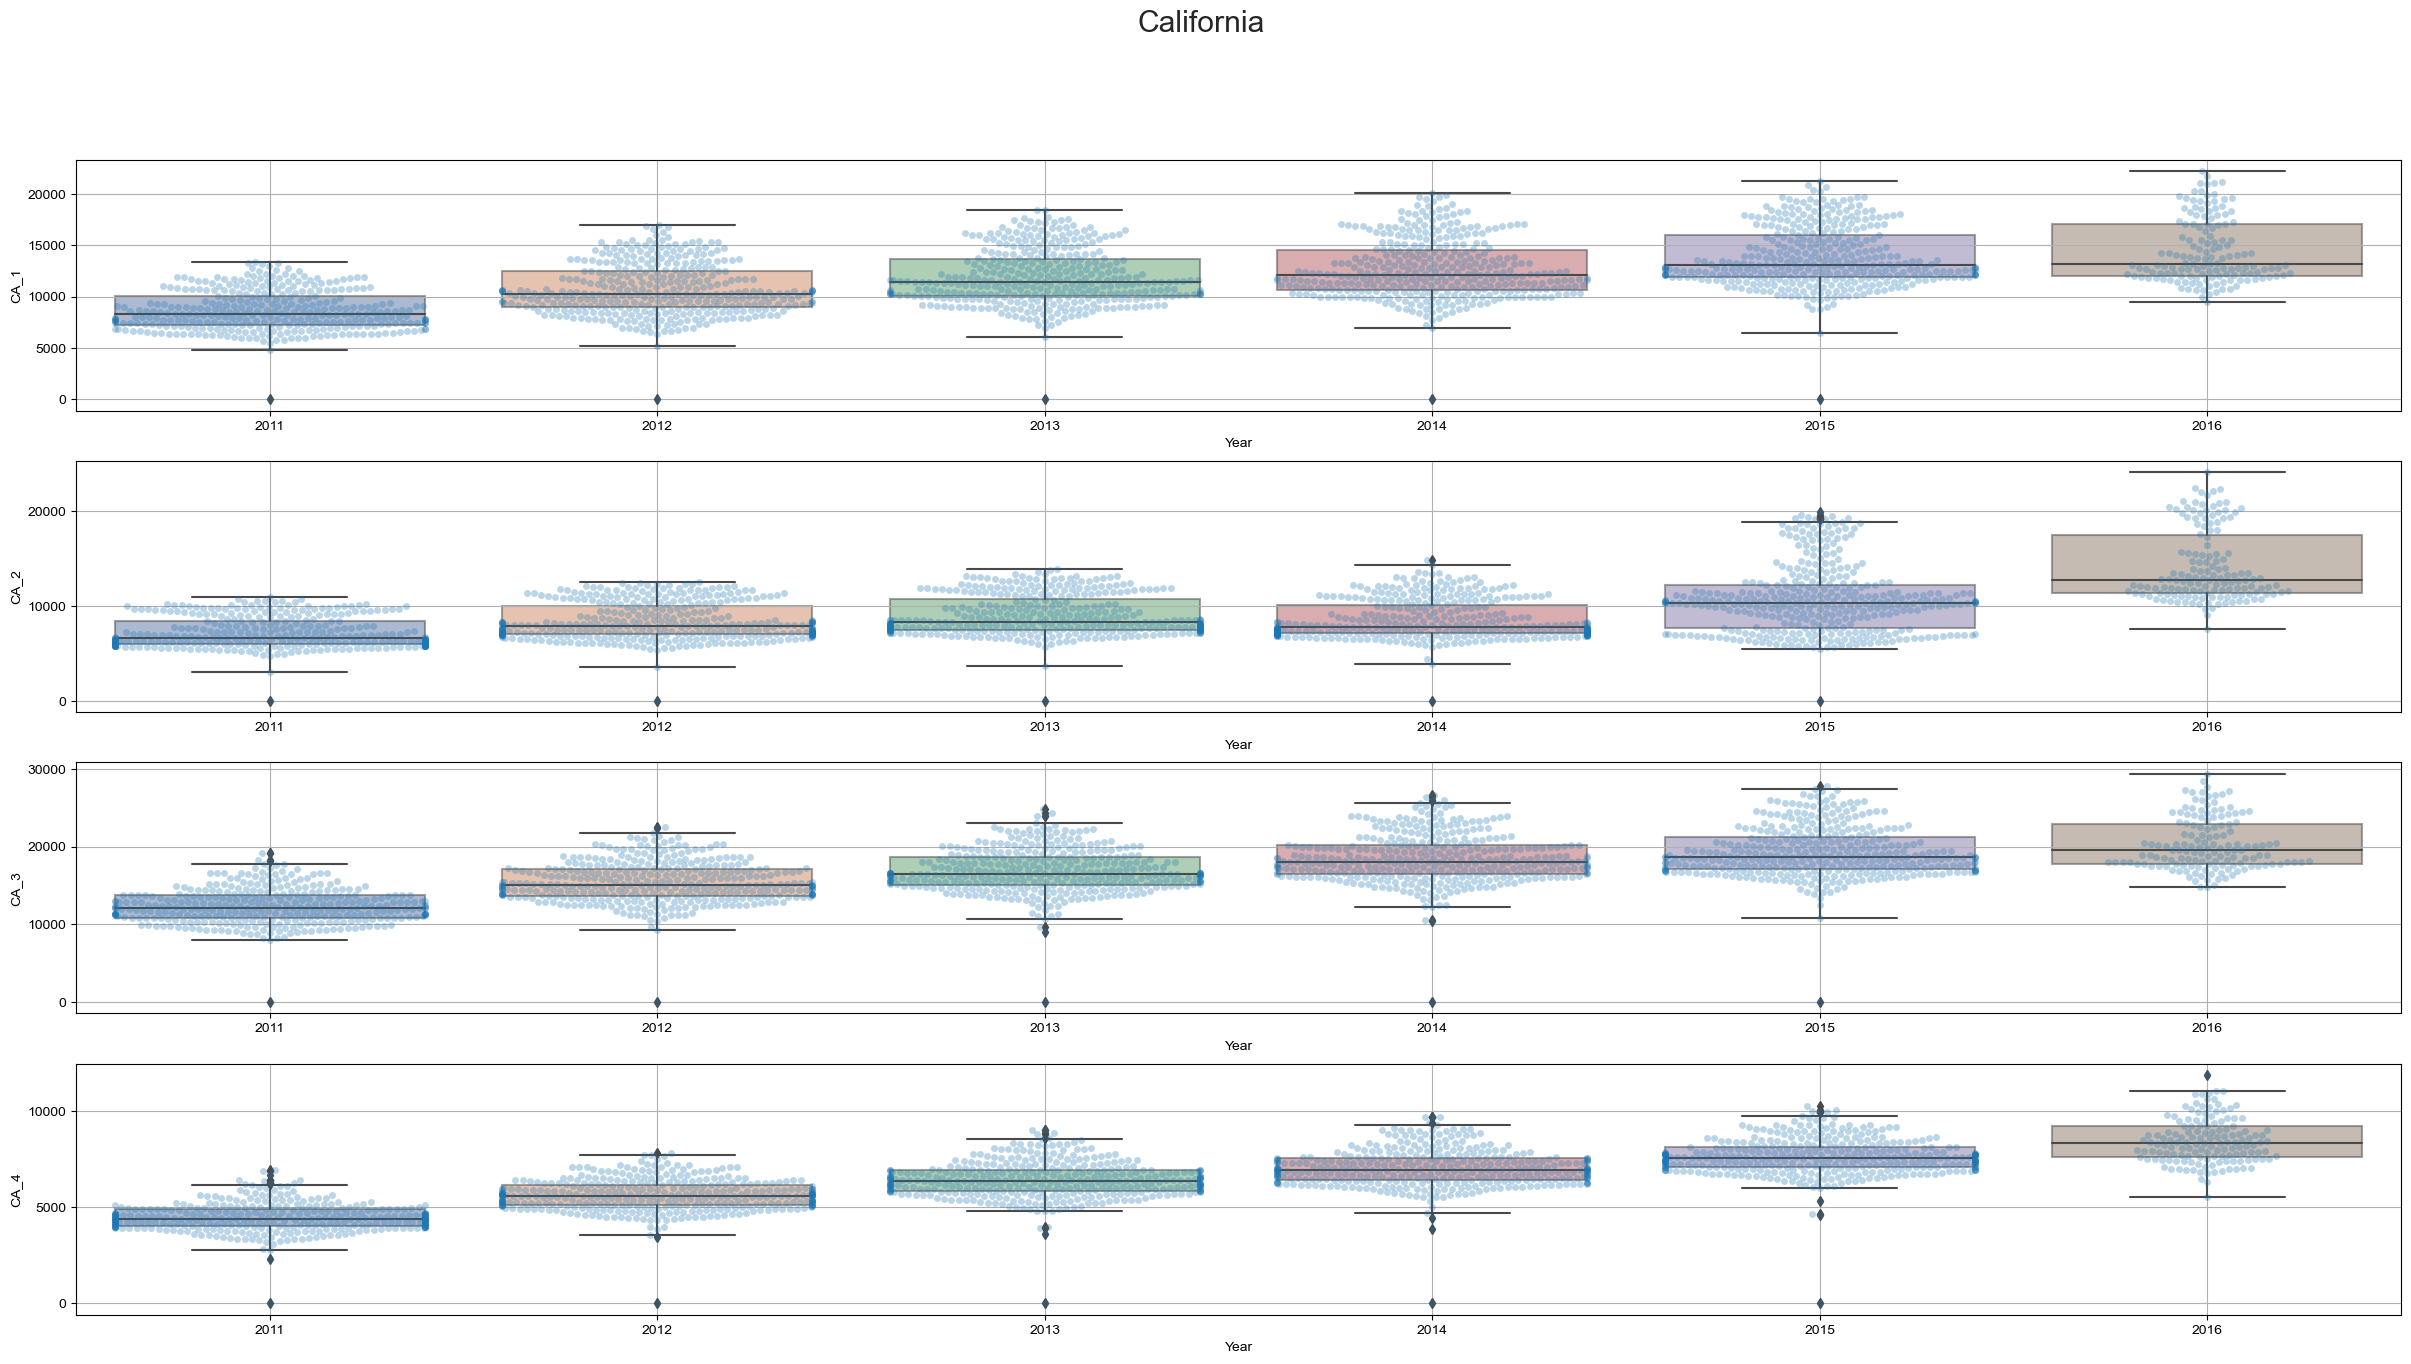

In [20]:
fig, axes = plt.subplots(figsize= (30,15), nrows=4, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(4):    
    sns.boxplot(ax=axes[i], x=ca_store_sales_sum.index.year.tolist(),y=f'CA_{i+1}', data=ca_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'CA_{i+1}', ax=axes[i], data=ca_store_sales_sum, x=ca_store_sales_sum.index.year.tolist(), 
                alpha=.3)
#     axes[i].set_title(f"California Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("California")

Text(0.5, 0.98, 'Texas')

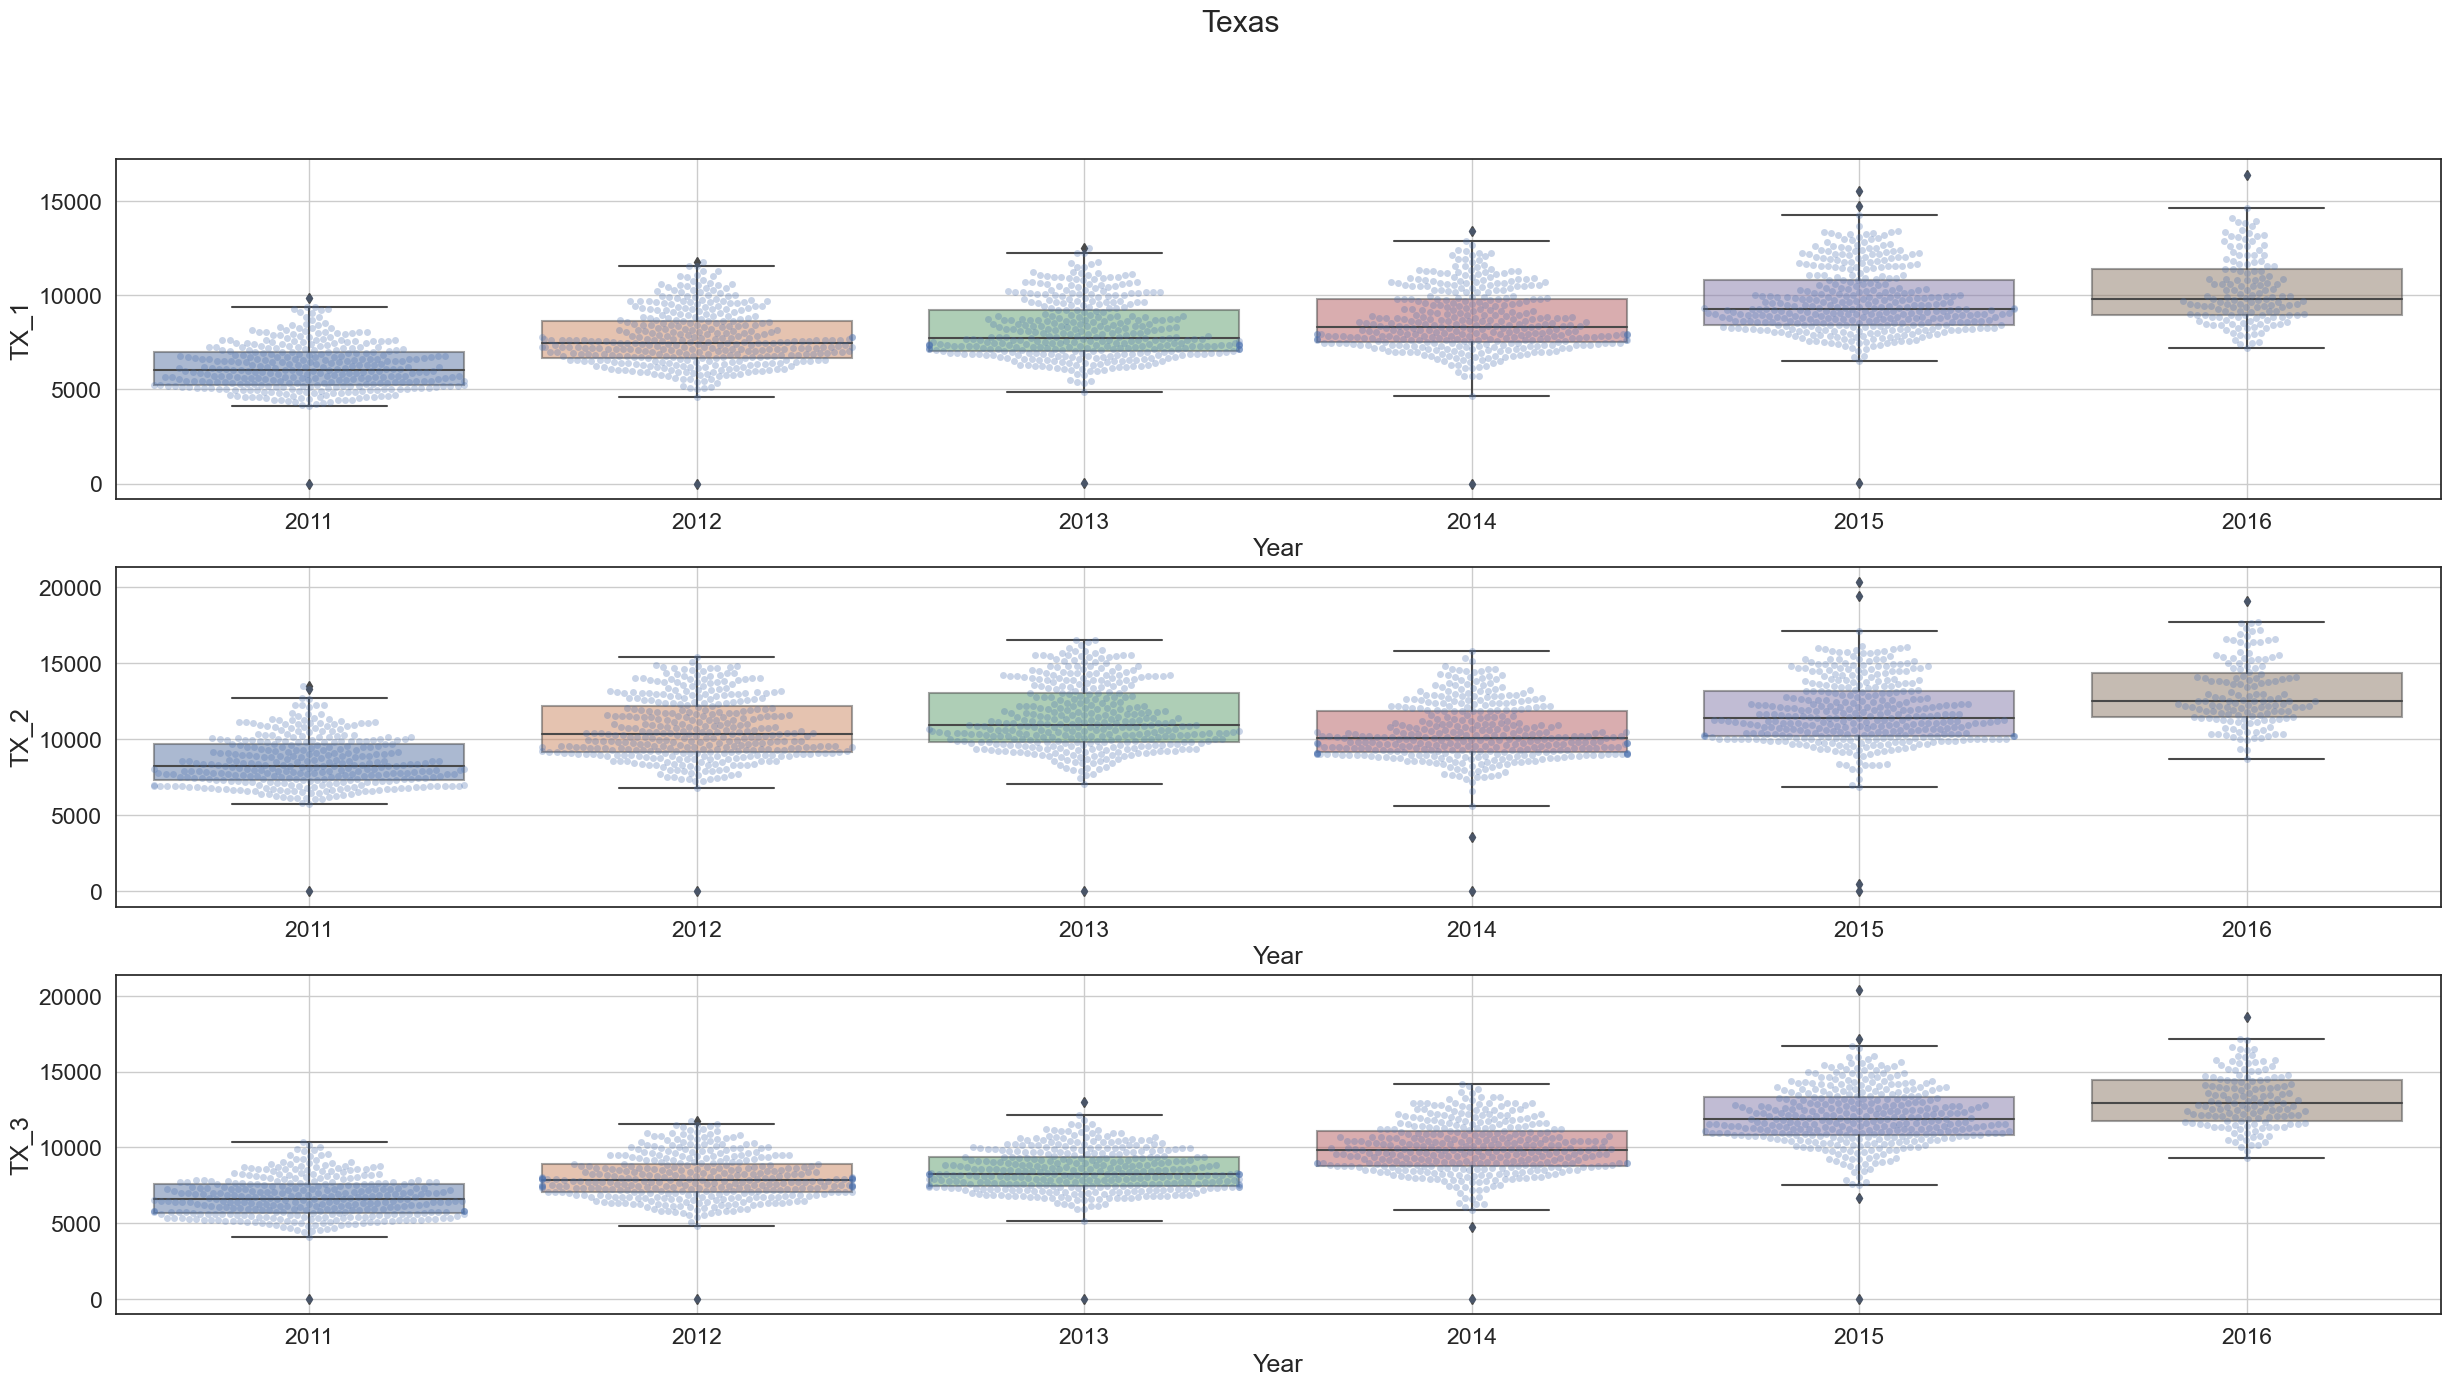

In [21]:
fig, axes = plt.subplots(figsize= (30,15), nrows=3, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(3):    
    sns.boxplot(ax=axes[i], x=tx_store_sales_sum.index.year.tolist(),y=f'TX_{i+1}', data=tx_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'TX_{i+1}', ax=axes[i], data=tx_store_sales_sum, x=tx_store_sales_sum.index.year.tolist(),
                 alpha=.3)
#     axes[i].set_title(f"Texas Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("Texas")

Text(0.5, 0.98, 'Wisconsin')

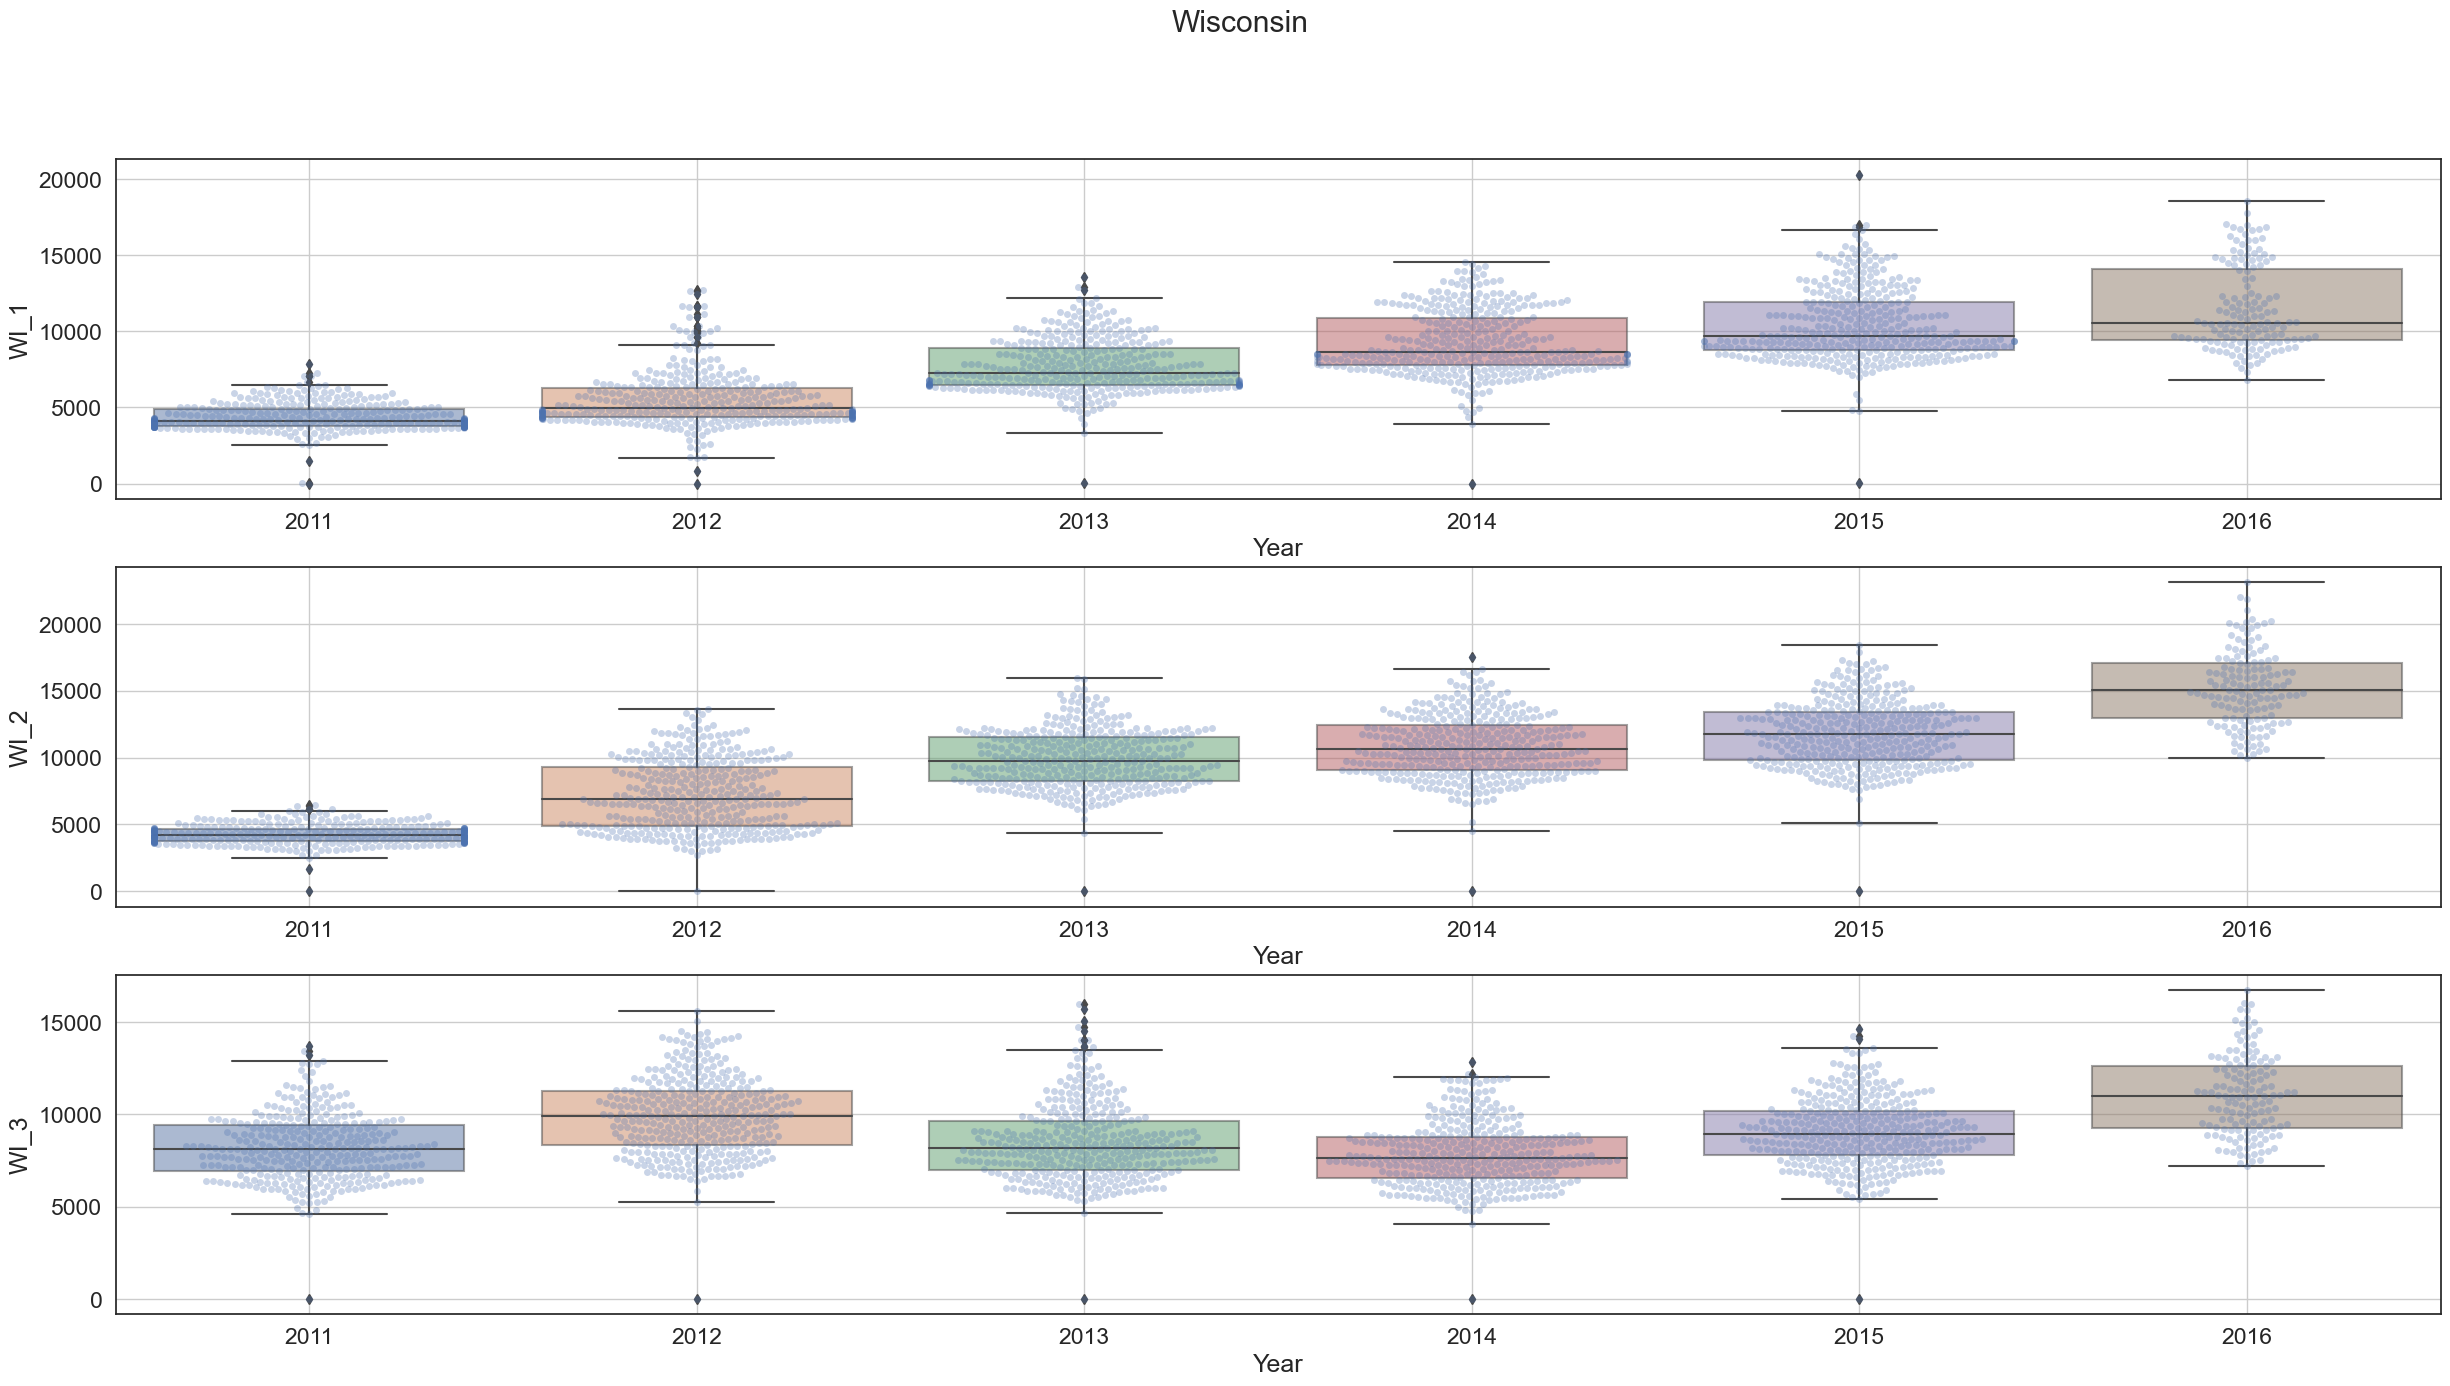

In [22]:
fig, axes = plt.subplots(figsize= (30,15), nrows=3, ncols=1)
sns.set(style='white', font_scale=1.5)
for i in range(3):    
    sns.boxplot(ax=axes[i], x=wi_store_sales_sum.index.year.tolist(),y=f'WI_{i+1}', data=wi_store_sales_sum, 
                boxprops=dict(alpha=.5));
    sns.swarmplot(y=f'WI_{i+1}', ax=axes[i], data=wi_store_sales_sum, x=wi_store_sales_sum.index.year.tolist(),
                 alpha=.3)
#     axes[i].set_title(f"Wisconsin Store {i+1}")
    axes[i].set_xlabel('Year')
    axes[i].grid(True)
fig.suptitle("Wisconsin")
# fig.tight_layout()

# Lag Features

In [100]:
ca1_df, ca2_df, ca3_df, ca4_df = [ca_store_sales_sum[i].copy().to_frame().rename(columns={i: 'total_sales'}) for i in ["CA_1","CA_2","CA_3","CA_4"]]
ca1_df.head()

total_sales
date                   
2011-01-29     10933.16
2011-01-30      9787.06
2011-01-31      7201.38
2011-02-01      7407.74
2011-02-02      6566.12

In [101]:
features = ['date','wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA']

ca1_df = pd.merge(left=ca1_df, right=calendar_df[features], how='left', left_index=True, right_on='date').set_index('date')
ca2_df = pd.merge(left=ca2_df, right=calendar_df[features], how='left', left_index=True, right_on='date').set_index('date')
ca3_df = pd.merge(left=ca3_df, right=calendar_df[features], how='left', left_index=True, right_on='date').set_index('date')
ca4_df = pd.merge(left=ca4_df, right=calendar_df[features], how='left', left_index=True, right_on='date').set_index('date')
ca4_df.head()

total_sales  wday  month  year event_name_1 event_type_1  \
date                                                                   
2011-01-29      4561.59     1      1  2011          NaN          NaN   
2011-01-30      4681.41     2      1  2011          NaN          NaN   
2011-01-31      3637.98     3      1  2011          NaN          NaN   
2011-02-01      3708.92     4      2  2011          NaN          NaN   
2011-02-02      3841.14     5      2  2011          NaN          NaN   

           event_name_2 event_type_2  snap_CA  
date                                           
2011-01-29          NaN          NaN        0  
2011-01-30          NaN          NaN        0  
2011-01-31          NaN          NaN        0  
2011-02-01          NaN          NaN        1  
2011-02-02          NaN          NaN        1

In [104]:
def set_lag_features(df):
    target_map = df['total_sales'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [105]:
ca1_df = set_lag_features(ca1_df)
ca2_df = set_lag_features(ca2_df)
ca3_df = set_lag_features(ca3_df)

total_sales  wday  month  year event_name_1 event_type_1  \
date                                                                   
2011-01-29     10933.16     1      1  2011          NaN          NaN   
2011-01-30      9787.06     2      1  2011          NaN          NaN   
2011-01-31      7201.38     3      1  2011          NaN          NaN   
2011-02-01      7407.74     4      2  2011          NaN          NaN   
2011-02-02      6566.12     5      2  2011          NaN          NaN   

           event_name_2 event_type_2  snap_CA  lag1  lag2  lag3  
date                                                             
2011-01-29          NaN          NaN        0   NaN   NaN   NaN  
2011-01-30          NaN          NaN        0   NaN   NaN   NaN  
2011-01-31          NaN          NaN        0   NaN   NaN   NaN  
2011-02-01          NaN          NaN        1   NaN   NaN   NaN  
2011-02-02          NaN          NaN        1   NaN   NaN   NaN

In [106]:
ca1_df.tail()

total_sales  wday  month  year event_name_1 event_type_1  \
date                                                                   
2016-05-18     12920.62     5      5  2016          NaN          NaN   
2016-05-19     13259.90     6      5  2016          NaN          NaN   
2016-05-20     13999.65     7      5  2016          NaN          NaN   
2016-05-21     18637.70     1      5  2016          NaN          NaN   
2016-05-22     21110.44     2      5  2016          NaN          NaN   

           event_name_2 event_type_2  snap_CA      lag1      lag2      lag3  
date                                                                         
2016-05-18          NaN          NaN        0  11266.68   9799.19   9869.71  
2016-05-19          NaN          NaN        0  11181.34   9862.32  10021.93  
2016-05-20          NaN          NaN        0  14392.40  11743.45  12387.69  
2016-05-21          NaN          NaN        0  16860.43  13620.88  13502.41  
2016-05-22          NaN          NaN        0  17496.42  13460.66  12594.23

# Create First Model

In [111]:
ca1_df_dummy = pd.get_dummies(ca1_df, columns=[ 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])
ca1_df_dummy

total_sales  wday  month  year  snap_CA      lag1      lag2  \
date                                                                      
2011-01-29     10933.16     1      1  2011        0       NaN       NaN   
2011-01-30      9787.06     2      1  2011        0       NaN       NaN   
2011-01-31      7201.38     3      1  2011        0       NaN       NaN   
2011-02-01      7407.74     4      2  2011        1       NaN       NaN   
2011-02-02      6566.12     5      2  2011        1       NaN       NaN   
...                 ...   ...    ...   ...      ...       ...       ...   
2016-05-18     12920.62     5      5  2016        0  11266.68   9799.19   
2016-05-19     13259.90     6      5  2016        0  11181.34   9862.32   
2016-05-20     13999.65     7      5  2016        0  14392.40  11743.45   
2016-05-21     18637.70     1      5  2016        0  16860.43  13620.88   
2016-05-22     21110.44     2      5  2016        0  17496.42  13460.66   

                lag3  event_name_1_Chanukah End  event_name_1_Christmas  \
date                                                                      
2011-01-29       NaN                          0                       0   
2011-01-30       NaN                          0                       0   
2011-01-31       NaN                          0                       0   
2011-02-01       NaN                          0                       0   
2011-02-02       NaN                          0                       0   
...              ...                        ...                     ...   
2016-05-18   9869.71                          0                       0   
2016-05-19  10021.93                          0                       0   
2016-05-20  12387.69                          0                       0   
2016-05-21  13502.41                          0                       0   
2016-05-22  12594.23                          0                       0   

            event_name_1_Cinco De Mayo  event_name_1_ColumbusDay  \
date                                                               
2011-01-29                           0                         0   
2011-01-30                           0                         0   
2011-01-31                           0                         0   
2011-02-01                           0                         0   
2011-02-02                           0                         0   
...                                ...                       ...   
2016-05-18                           0                         0   
2016-05-19                           0                         0   
2016-05-20                           0                         0   
2016-05-21                           0                         0   
2016-05-22                           0                         0   

            event_name_1_Easter  event_name_1_Eid al-Fitr  \
date                                                        
2011-01-29                    0                         0   
2011-01-30                    0                         0   
2011-01-31                    0                         0   
2011-02-01                    0                         0   
2011-02-02                    0                         0   
...                         ...                       ...   
2016-05-18                    0                         0   
2016-05-19                    0                         0   
2016-05-20                    0                         0   
2016-05-21                    0                         0   
2016-05-22                    0                         0   

            event_name_1_EidAlAdha  event_name_1_Father's day  \
date                                                            
2011-01-29                       0                          0   
2011-01-30                       0                          0   
2011-01-31                       0                          0   
2011-02-01                       0                      

In [112]:
ca1_df_dummy.index.max()

Timestamp('2016-05-22 00:00:00')

In [117]:
train_df = ca1_df_dummy['total_sales'].loc[ca1_df_dummy.index < '2016-05-01']
test_df = ca1_df_dummy['total_sales'].loc[ca1_df_dummy.index >= '2016-05-01']

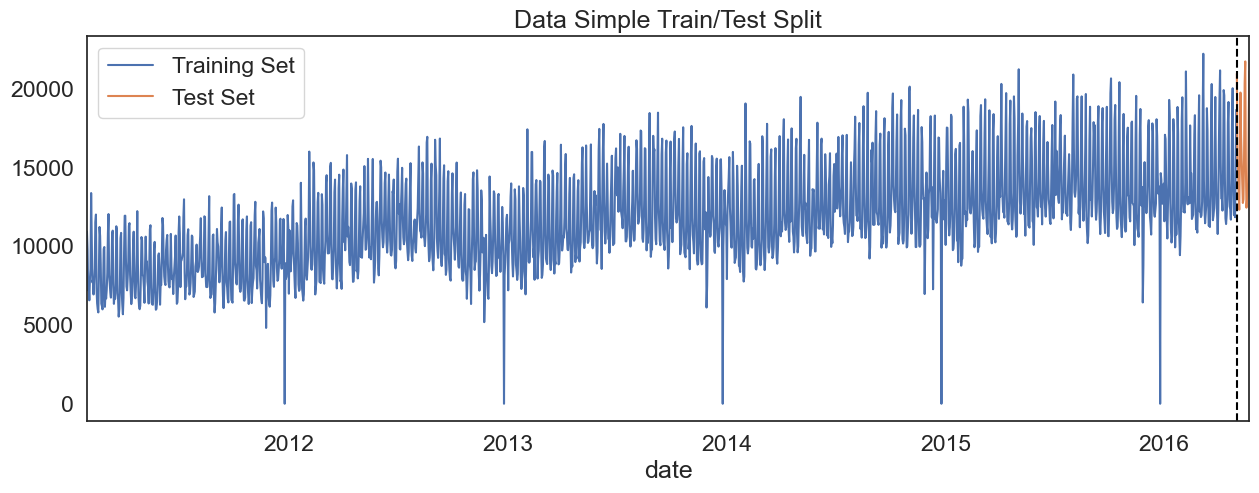

In [121]:
fig, axes = plt.subplots(figsize=(15,5))
train_df.plot(ax=axes, label='Training Set', title= 'Data Simple Train/Test Split')
test_df.plot(ax=axes, label='Test Set')
axes.axvline('2016-05-01', color='black', ls='--')
axes.legend(['Training Set', 'Test Set'])
plt.show()

<Axes: xlabel='date'>

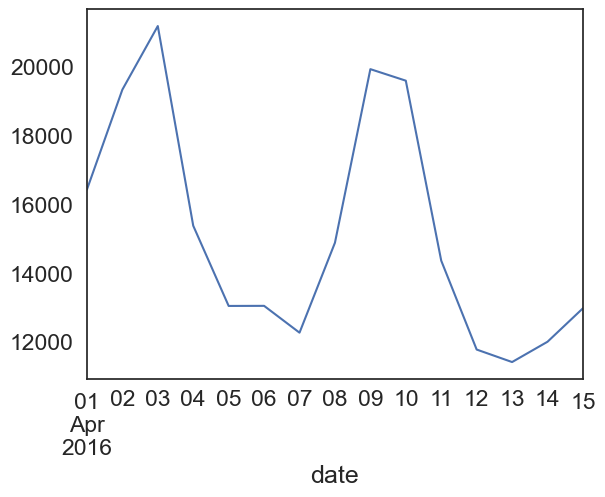

In [124]:
train_df.loc[(train_df.index >= '2016-04-01') & (train_df.index < '2016-04-16')].plot()

In [130]:
model_features = ['wday', 'month', 'year', 'snap_CA', 'lag1', 'lag2',
                  'lag3', 'event_name_1_Chanukah End', 'event_name_1_Christmas',
                  'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
                  'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
                  'event_name_1_EidAlAdha', "event_name_1_Father's day",
                  'event_name_1_Halloween', 'event_name_1_IndependenceDay',
                  'event_name_1_LaborDay', 'event_name_1_LentStart',
                  'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',       
                  'event_name_1_MemorialDay', "event_name_1_Mother's day",
                  'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
                  'event_name_1_NewYear', 'event_name_1_OrthodoxChristmas',
                  'event_name_1_OrthodoxEaster', 'event_name_1_Pesach End',
                  'event_name_1_PresidentsDay', 'event_name_1_Purim End',
                  'event_name_1_Ramadan starts', 'event_name_1_StPatricksDay',
                  'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
                  'event_name_1_ValentinesDay', 'event_name_1_VeteransDay',
                  'event_type_1_Cultural', 'event_type_1_National',
                  'event_type_1_Religious', 'event_type_1_Sporting',
                  'event_name_2_Cinco De Mayo', 'event_name_2_Easter',
                  "event_name_2_Father's day", "event_name_2_OrthodoxEaster",
                  'event_type_2_Cultural', 'event_type_2_Religious']
model_target = 'total_sales'

In [131]:
train_df = ca1_df_dummy.loc[ca1_df_dummy.index < '2016-05-01']
test_df = ca1_df_dummy.loc[ca1_df_dummy.index >= '2016-05-01']

In [132]:
X_train = train_df[model_features]
y_train = train_df[model_target]

X_test = test_df[model_features]
y_test = test_df[model_target]

In [137]:
reg = xgb.XGBRegressor(n_estimators=1000, 
                       early_stopping_rounds=100,
                       learning_rate=.1)
reg.fit(X_train, y_train,
       eval_set = [(X_train, y_train), (X_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:11000.67475	validation_1-rmse:14731.84422
[100]	validation_0-rmse:563.17165	validation_1-rmse:1408.74723
[200]	validation_0-rmse:446.19539	validation_1-rmse:1380.34318
[264]	validation_0-rmse:397.72111	validation_1-rmse:1384.00298


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [139]:
fea_imp = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])

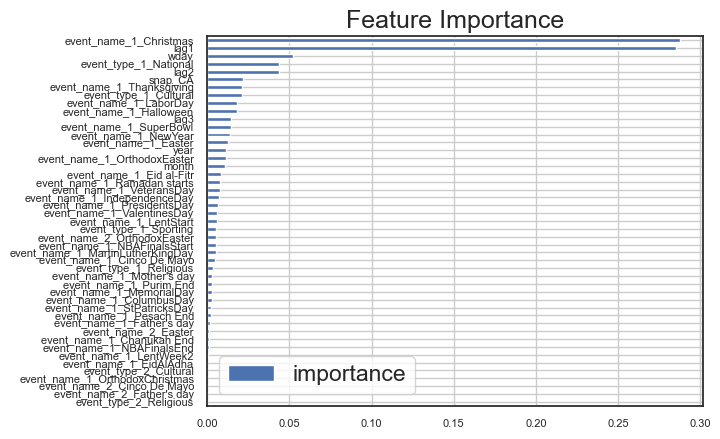

In [146]:
fea_imp.sort_values('importance').plot(kind='barh', title='Feature Importance',fontsize=8, grid=True)
plt.show()

In [154]:
df_ca1 = ca1_df.copy()

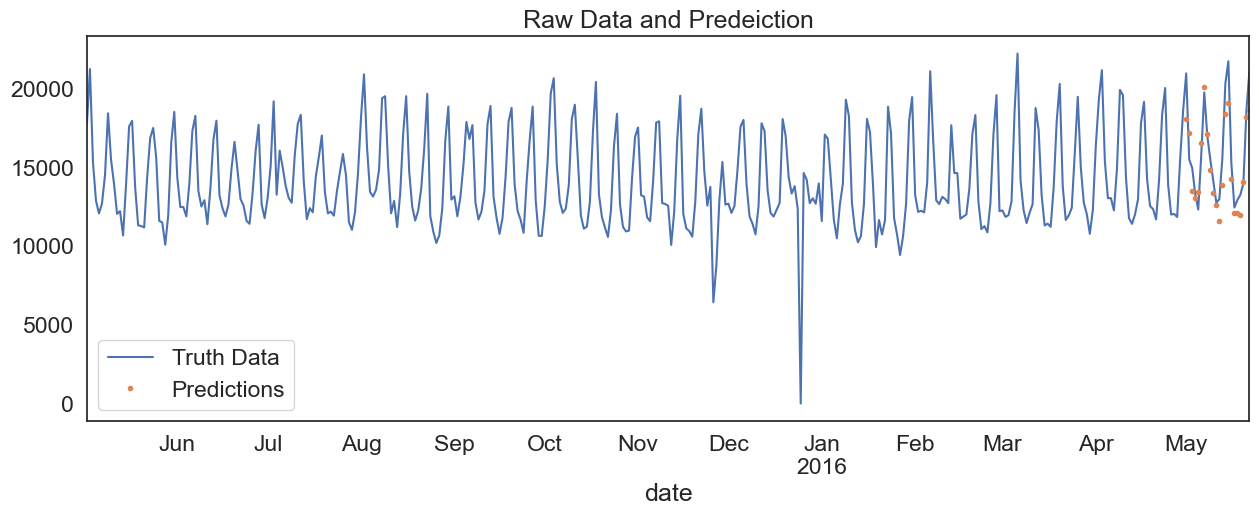

In [155]:
test_df['prediction'] = reg.predict(X_test)
df_ca1 = df_ca1.merge(test_df[['prediction']], how='left', left_index=True, right_index=True)
ax = df_ca1[['total_sales']].loc[ca1_df_dummy.index > '2015-05-01'].plot(figsize=(15,5))
df_ca1['prediction'].loc[ca1_df_dummy.index > '2015-05-01'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predeiction')
plt.show()

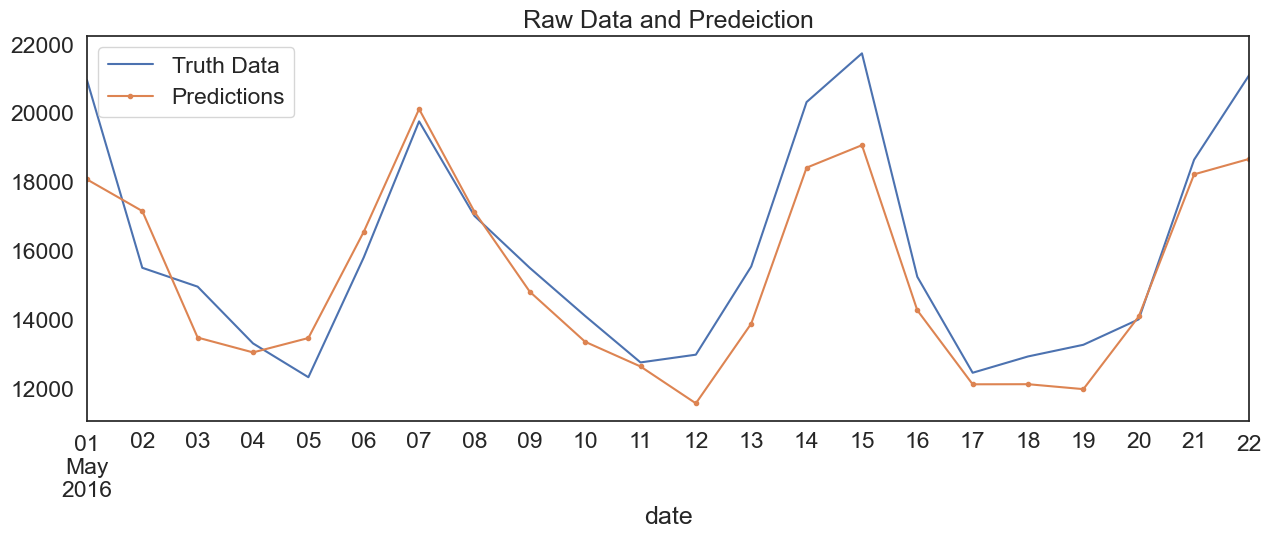

In [161]:
ax = df_ca1[['total_sales']].loc[df_ca1.index >= '2016-05-01'].plot(figsize=(15,5))
df_ca1['prediction'].loc[df_ca1.index >= '2016-05-01'].plot(ax=ax, style='.-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predeiction')
plt.show()

In [163]:
model_1_score = np.sqrt(mean_squared_error(test_df['total_sales'], test_df['prediction']))
print(f'Root Mean Squared Error (RMSE) on Test set: {model_1_score:.2f}')

Root Mean Squared Error (RMSE) on Test set: 1372.56


# NEW

In [10]:
print(calendar_df.shape)
print(calendar_df.columns)

(1969, 14)
Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')


In [15]:
# Converting calandar df to train_df like data. Transposing the df and renaming columns
cal_cols = list(calendar_df['d'])
cal_rows = ['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']
cal_converted_df = pd.DataFrame(calendar_df[cal_rows].values.T,
                               index=cal_rows,
                               columns=cal_cols)
cal_converted_df = cal_converted_df.fillna(0)

In [16]:
cal_converted_df.head(10)

d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8        d_9  d_10  ...  \
event_name_1    0    0    0    0    0    0    0    0  SuperBowl     0  ...   
event_type_1    0    0    0    0    0    0    0    0   Sporting     0  ...   
event_name_2    0    0    0    0    0    0    0    0          0     0  ...   
event_type_2    0    0    0    0    0    0    0    0          0     0  ...   
snap_CA         0    0    0    1    1    1    1    1          1     1  ...   
snap_TX         0    0    0    1    0    1    0    1          1     1  ...   
snap_WI         0    0    0    0    1    1    0    1          1     0  ...   

              d_1960  d_1961  d_1962  d_1963  d_1964  d_1965 d_1966  d_1967  \
event_name_1       0       0       0       0       0       0      0       0   
event_type_1       0       0       0       0       0       0      0       0   
event_name_2       0       0       0       0       0       0      0       0   
event_type_2       0       0       0       0       0       0      0       0   
snap_CA            1       0       0       0       0       0      0       0   
snap_TX            0       1       1       1       0       1      0       0   
snap_WI            0       1       1       0       1       1      0       0   

              d_1968        d_1969  
event_name_1       0  NBAFinalsEnd  
event_type_1       0      Sporting  
event_name_2       0  Father's day  
event_type_2       0      Cultural  
snap_CA            0             0  
snap_TX            0             0  
snap_WI            0             0  

[7 rows x 1969 columns]

In [23]:
event_name_1_se = cal_converted_df.loc['event_name_1'].apply(lambda x: x if re.search("^\d+$", str(x)) else np.nan)
event_name_2_se = cal_converted_df.loc['event_name_2'].apply(lambda x: x if re.search("^\d+$", str(x)) else np.nan)
event_name_2_se.unique()

array([ 0., nan])

In [24]:
cal_converted_df.loc['event_name_1'].dtypes

dtype('O')

In [47]:
calendar_df.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [58]:
prices_df['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [27]:
prices_df.describe()

wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

In [28]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [ ]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])


In [37]:
calendar_df.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [38]:
cat_cal_df = calendar_df.copy()
features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
for feature in features:
    cat_cal_df[feature].fillna('unknown', inplace = True)
cat_cols = ['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']
for col in cat_cols:
    encoder = LabelEncoder()
    cat_cal_df[col] = encoder.fit_transform(cat_cal_df[col])

In [39]:
cat_cal_df.head()

date  wm_yr_wk    weekday  wday  month  year    d  event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1            30   
1  2011-01-30     11101     Sunday     2      1  2011  d_2            30   
2  2011-01-31     11101     Monday     3      1  2011  d_3            30   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4            30   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5            30   

   event_type_1  event_name_2  event_type_2  snap_CA  snap_TX  snap_WI  
0             4             4             2        0        0        0  
1             4             4             2        0        0        0  
2             4             4             2        0        0        0  
3             4             4             2        1        1        0  
4             4             4             2        1        0        1

In [40]:
cat_cal_df_T = pd.DataFrame(cat_cal_df[['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']].values.T,
                            index=['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI'])
cat_cal_df_T.head()

0     1     2     3     4     5     6     7     8     9     ...  \
event_name_1    30    30    30    30    30    30    30    30    26    30  ...   
event_type_1     4     4     4     4     4     4     4     4     3     4  ...   
event_name_2     4     4     4     4     4     4     4     4     4     4  ...   
event_type_2     2     2     2     2     2     2     2     2     2     2  ...   
snap_CA          0     0     0     1     1     1     1     1     1     1  ...   

              1959  1960  1961  1962  1963  1964  1965  1966  1967  1968  
event_name_1    30    30    30    30    30    30    30    30    30    16  
event_type_1     4     4     4     4     4     4     4     4     4     3  
event_name_2     4     4     4     4     4     4     4     4     4     2  
event_type_2     2     2     2     2     2     2     2     2     2     0  
snap_CA          1     0     0     0     0     0     0     0     0     0  

[5 rows x 1969 columns]

In [41]:
price_feature = cat_cal_df[['wm_yr_wk','date']].merge(prices_df, on = ['wm_yr_wk'], how = 'left')
price_feature['id'] = price_feature['item_id'] + '_' + price_feature['store_id'] + '_validation'
price_feature.head()

wm_yr_wk        date store_id        item_id  sell_price  \
0     11101  2011-01-29     CA_1  HOBBIES_1_008        0.46   
1     11101  2011-01-29     CA_1  HOBBIES_1_009        1.56   
2     11101  2011-01-29     CA_1  HOBBIES_1_010        3.17   
3     11101  2011-01-29     CA_1  HOBBIES_1_012        5.98   
4     11101  2011-01-29     CA_1  HOBBIES_1_015        0.70   

                              id  
0  HOBBIES_1_008_CA_1_validation  
1  HOBBIES_1_009_CA_1_validation  
2  HOBBIES_1_010_CA_1_validation  
3  HOBBIES_1_012_CA_1_validation  
4  HOBBIES_1_015_CA_1_validation

In [43]:
temp_df = price_feature.pivot('id','date','sell_price')
temp_df.head()

C:\Users\snaza\AppData\Local\Temp\ipykernel_6880\621678897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp_df = price_feature.pivot('id','date','sell_price')


date                         2011-01-29  2011-01-30  2011-01-31  2011-02-01  \
id                                                                            
FOODS_1_001_CA_1_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_2_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_3_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_4_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_TX_1_validation         2.0         2.0         2.0         2.0   

date                         2011-02-02  2011-02-03  2011-02-04  2011-02-05  \
id                                                                            
FOODS_1_001_CA_1_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_2_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_3_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_CA_4_validation         2.0         2.0         2.0         2.0   
FOODS_1_001_TX_1_validation         2.0         2.0         2.0         2.0   

date                         2011-02-06  2011-02-07  ...  2016-06-10  \
id                                                   ...               
FOODS_1_001_CA_1_validation         2.0         2.0  ...        2.24   
FOODS_1_001_CA_2_validation         2.0         2.0  ...        2.24   
FOODS_1_001_CA_3_validation         2.0         2.0  ...        2.24   
FOODS_1_001_CA_4_validation         2.0         2.0  ...        2.24   
FOODS_1_001_TX_1_validation         2.0         2.0  ...        2.24   

date                         2016-06-11  2016-06-12  2016-06-13  2016-06-14  \
id                                                                            
FOODS_1_001_CA_1_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_2_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_3_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_4_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_TX_1_validation        2.24        2.24        2.24        2.24   

date                         2016-06-15  2016-06-16  2016-06-17  2016-06-18  \
id                                                                            
FOODS_1_001_CA_1_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_2_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_3_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_CA_4_validation        2.24        2.24        2.24        2.24   
FOODS_1_001_TX_1_validation        2.24        2.24        2.24        2.24   

date                         2016-06-19  
id                                       
FOODS_1_001_CA_1_validation        2.24  
FOODS_1_001_CA_2_validation        2.24  
FOODS_1_001_CA_3_validation        2.24  
FOODS_1_001_CA_4_validation        2.24  
FOODS_1_001_TX_1_validation        2.24  

[5 rows x 1969 columns]

In [55]:
price_df = train_df.merge(temp_df,on=['id'],how= 'left').iloc[:,-train_df.shape[1]:]
price_df.index = train_df.id
# price_df.set_index('id')
price_df.head()

2011-03-20  2011-03-21  2011-03-22  2011-03-23  \
id                                                                              
HOBBIES_1_001_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_002_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_003_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_004_CA_1_validation        4.34        4.34        4.34        4.34   
HOBBIES_1_005_CA_1_validation         NaN         NaN         NaN         NaN   

                               2011-03-24  2011-03-25  2011-03-26  2011-03-27  \
id                                                                              
HOBBIES_1_001_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_002_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_003_CA_1_validation         NaN         NaN         NaN         NaN   
HOBBIES_1_004_CA_1_validation        4.34        4.34        4.34        4.34   
HOBBIES_1_005_CA_1_validation         NaN         NaN         NaN         NaN   

                               2011-03-28  2011-03-29  ...  2016-06-10  \
id                                                     ...               
HOBBIES_1_001_CA_1_validation         NaN         NaN  ...        8.38   
HOBBIES_1_002_CA_1_validation         NaN         NaN  ...        3.97   
HOBBIES_1_003_CA_1_validation         NaN         NaN  ...        2.97   
HOBBIES_1_004_CA_1_validation        4.34        4.34  ...        4.64   
HOBBIES_1_005_CA_1_validation         NaN         NaN  ...        2.88   

                               2016-06-11  2016-06-12  2016-06-13  2016-06-14  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.38        8.38        8.38        8.38   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-06-15  2016-06-16  2016-06-17  2016-06-18  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.38        8.38        8.38        8.38   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-06-19  
id                                         
HOBBIES_1_001_CA_1_validation        8.38  
HOBBIES_1_002_CA_1_validation        3.97  
HOBBIES_1_003_CA_1_validation        2.97  
HOBBIES_1_004_CA_1_validation        4.64  
HOBBIES_1_005_CA_1_validation        2.88  

[5 rows x 1919 columns]

In [56]:
price_df.shape

(30490, 1919)